# Mergesort

In the chapter Order and sorting we saw some algorithms for sorting arrays (selection  sort, insertion sort, bubble sort) that we said we would be *discard* given that they did not work well for large arrays. You were encouraged to test Python's sorting algorithm, selection sort and insertion sort to experience how long it could take for large arrays. You were also encouraged in the section Measuring and estimating execution time to plot the execution time of the programs. 

Now we will discuss the algorithm that lies behind Python's own sortin algorithm: Mergesort.  When we are done you will see that the algorithm is *almost* linear (linearithmic or $n \, $log$ \,n$). And this is amazing: you can sort an array almost as fast as you can fill it with elements! Tim Roughgarden calls this a *for-free primitive*: a component you can use in algorithms that need sorted arrays in order to work. 


Recall the three steps of Divide & Conquer:

 1) *Divide* the input into smaller parts to get subproblems
 
 2) *Conquer* the subproblems  recursively.
  
 3) *Combine* the solutions to the subproblems into a solution for the original problem.
 
and try the more immediate way of dividing the input. 

What *is* the input? The problem we are trying to solve is *sorting an array*, so the input is the array to be sorted. We do step 1) in constant time: divide the input into two halves: we just need to pick the middle index!

Given this, do step 2) that is given: sort each of the two halves recursively!

And now to step 3). I hope you have already realized that we cannot just put the two sorted halves together! Here is an example of two halves that are sorted but that together do not form a sorted array:

```Python
[1,3,5,2,4,6]
```

So, say you have the two sorted halves ```[1,3,5]``` and ```[2,4,6]```, can we think of an efficient way of combining them into a solution to sorting an array with all these elements? Well yes, if you have an extra array where to put the elements: then you can go from left to right in both halves and pick the smallest element, whether from the first half or from the second one. This idea is called *merging* the two halves. 

Here is a program, ```book_merge``` that implements this idea. We follow the book closely (Section 1.4.5) and write it in a way that takes two arrays as arguments and produces an array as result. The program has some more detail than the figure in Section 1.4.5. To understand it you have to read the last paragraph of the section where it says that you have to take care of the cases where the traversal of C or D *falls off the end*. 

The important thing for the algorithm to work is that the two input arrays are themselves sorted.

Later on we will see how to adapt it in order to sort *in place* (modifying the array).

In [1]:
def book_merge(c, d):
    b = [None] * (len(c) + len(d))
    
    i = 0 # i is the index for c
    j = 0 # j is the index for d
    
    for k in range(len(b)): # k is the index for b
        
        if i == len(c): # fell off the end of c: just copy the elements in d
            b[k] = d[j]
            j += 1
            
        elif j == len(d): # fell off the end of d: just copy the elements of c
            b[k] = c[i]
            i += 1
            
        elif c[i] < d[j]: # still inside both c and d!
            b[k] = c[i]
            i += 1
            
        else: 
            b[k] = d[j]
            j += 1
            
    return b

In [2]:
book_merge([1,3,5], [2,4,6])

[1, 2, 3, 4, 5, 6]

## Quiz

What is the asymptotic running time of the code for ```book_merge```?

1) $O(1)$
    
2) $O($log$ \, n)$
    
3) $O(n)$
    
4) $O(n^2)$
    

So, back to the Divide & Conquer idea:

Given an array ```a```, to sort ```a```

1) split it into two halves, 

2) recursively sort each of the halves,

3) merge the two sorted halves

In order to do everything *in place* we will use indices to mark the different parts of the array and we will create an auxiliary array to support merging. We use an auxiliary function to use all these arguments. We follow the convention in Python of using names that start with underscore for auxiliary functions. And remember, we want to reorder the elements of ```a```, we do not want to return a sorted array.

The Divide & Conquer algorithm is implemented in the auxiliary function ```_sort```. 

Observe that also ```merge``` works with indices to mark the parts it works with. And that it does not return a sorted array, instead it updates ```a```.

In [3]:
def mergesort(a):
    n = len(a)
    aux = [None] * n
    _sort(a, 0, n, aux)
    
def _sort(a, lo, hi, aux):
    n = hi - lo
    if n <= 1: # base case: nothing left to do
        return
    # To the meat of the algorithm. Notice the two recursive calls.
    mid = (lo + hi) // 2 # Step 1) in D&C
    _sort(a, lo, mid, aux) # Step 2) in D&C
    _sort(a, mid, hi, aux) # Step 2) in D&C
    _merge(a, lo, mid, hi, aux) # Step 3) in D&C
    
    
def _merge(a, lo, mid, hi, aux):
    n = hi - lo
    i = lo
    j = mid
    # use aux[0:n] to merge the two parts a[lo:mid] and a[mid:hi]
    for k in range(n):
        if i == mid:
            aux[k] = a[j]
            j += 1
        elif j == hi:
            aux[k] = a[i]
            i += 1
        elif a[j] < a[i]:
            aux[k] = a[j]
            j += 1
        else:
            aux[k] = a[i]
            i += 1
    # update a with the merged parts
    a[lo:hi] = aux[0:n]

In [4]:
a = [5,3,1,6,4,2]
mergesort(a)
a

[1, 2, 3, 4, 5, 6]

## Testing and exploring execution time

In order to do an asymptotic analysis you need to read on the Master method. This is Chapter 4 in Part 1 of  [Algorithms Illuminated](http://algorithmsilluminated.org).

In this lecture notes we will use the fact that we have the program and plot execution time versus size of input. 

We use functions we already used before so we do not explain them.

In [5]:
import random
import time
import matplotlib.pyplot as plt
import math

In [6]:
def random_number_list(lower,upper,short,long):
    length = random.randrange(short,long)
    return [random.randrange(lower,upper) for i in range(length)]

def test_sorting_program_once(p, a):
    b = sorted(a)
    p(a)
    if b != a: print('expected', b, 'but found', a)
    return a == b

def test_sorting_program(p, times):
    for i in range(times):
        if not test_sorting_program_once(p, random_number_list(-10,10,0,1000)):
            return False
    return True
    

In [7]:
# sort 100 random arrays using mergesort and check whether it is sorted using Python's sort.
test_sorting_program(mergesort, 100)

True

In [8]:
# generate running time data
def running_time_data(start_size, p, step, times):
    n = start_size
    results = ([0] * times, [0] * times)
    for i in range(times):
        a = list(range(n))
        random.shuffle(a)
        start = time.process_time_ns() 
        p(a)
        (results[0][i],results[1][i]) = (n, time.process_time_ns() - start)
        n *= step
    return results

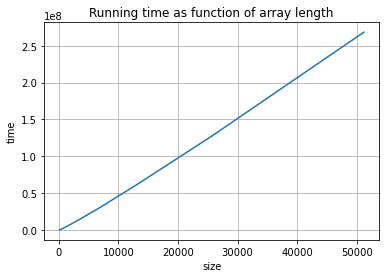

In [9]:
# the sizes and execution times for 10 random arrays of lengths 100, 200, 400, ..., 51200.
(size,t) = running_time_data(100,mergesort,2,10)

# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for time as function of size:
ax.plot(size, t)

# Decorate the graph:
ax.set(xlabel='size', ylabel='time',
       title='Running time as function of array length')

# Add a grid:
ax.grid()

# Display:
plt.show()

This looks almost linear. We cannot say much with this simple experiment. You will do a better experiment in the first assignment, Laboration 1. In Laboration 1 you will see yet another sorting algorithm also designed using Divide & Conquer. The algorithm is *quicksort* and has a more complicated step 1) but a very simple step 3): do nothing! Step 1) is called *partition* and it just moves to the left all elements smaller than a selected element in the array (called the pivot) and to the right all elements larger than the pivot. This can be done in linear time. 

If you read the book and / or apply the Master method yourself you will find out that the asymptotic time is $n \, $log$ \, n$.  So, lets plot this function:


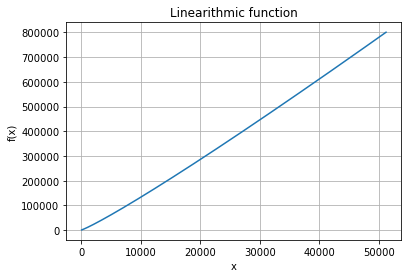

In [10]:
# The x values:
x  = range(100, 51200)

# The y values for the linearithmic function x * log_2(x)
fx = [i * math.log2(i) for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for fx:
ax.plot(x, fx)



# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x)',
       title='Linearithmic function')

# Add a grid:
ax.grid()

# Display:
plt.show()

The values in the y-axis are in another range, but the  curves are very similar!

### Notice

An asymptotic behaviour of $n \, $log$ \, n$ is what in the book is called a *for free primitive*: you can use it in your algorithms, it will not spoil them. 

One way of seeing this is that just filling in the array is already linear! And $n \, $log$ \, n$ is *almost linear*: asymptotically $$log$ \, n$ is almost a constant!
 
And now think: mergesort can sort an array as fast as filling in the array!